# **Assignment 3: Identifying the outliers using spectral clustering.** 

## Submitted by:

1. Nitish Kumar Gundapu **AI22MTECH14004** \\
2. Soumyanetra Pal **AI22MTECH14005** \\
3. Major Raviraj Deshmukh **AI22MTECH13008** \\
4. Vishnu Vijay Tiwari **AI22MTECH14003**

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1 . Getting data

In [2]:
def get_data():
  #getting the dataset
    data = pd.read_csv('./data.csv')
    return data

In [3]:
data = get_data()
data.head()

,cov1,cov2,cov3,cov4,cov5,cov6,cov7,sal_pur_rat,igst_itc_tot_itc_rat,lib_igst_itc_rat
0,0.997797,0.999888,0.215934,0.196713,0.000000,0.955616,0.998810,-0.032581,1.761759,-0.054329
1,0.994004,0.979902,-0.337135,-0.248634,0.000000,0.640812,0.553918,-0.032026,-0.629311,-0.053516
2,0.947603,0.455667,0.001743,0.128610,-0.004054,-0.162069,0.960601,-0.030209,1.535697,-0.054215
3,0.396577,0.919933,0.496451,0.576824,-0.340718,0.802363,0.673710,-0.032058,0.449160,-0.054126
4,0.999893,0.327615,0.700477,0.315601,0.000000,0.300785,0.979009,-0.032224,1.762049,-0.054330


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cov1                  1199 non-null   float64
 1   cov2                  1199 non-null   float64
 2   cov3                  1199 non-null   float64
 3   cov4                  1199 non-null   float64
 4   cov5                  1199 non-null   float64
 5   cov6                  1199 non-null   float64
 6   cov7                  1199 non-null   float64
 7   sal_pur_rat           1199 non-null   float64
 8   igst_itc_tot_itc_rat  1199 non-null   float64
 9   lib_igst_itc_rat      1199 non-null   float64
dtypes: float64(10)
memory usage: 93.8 KB


1.1 Paerson Corelation

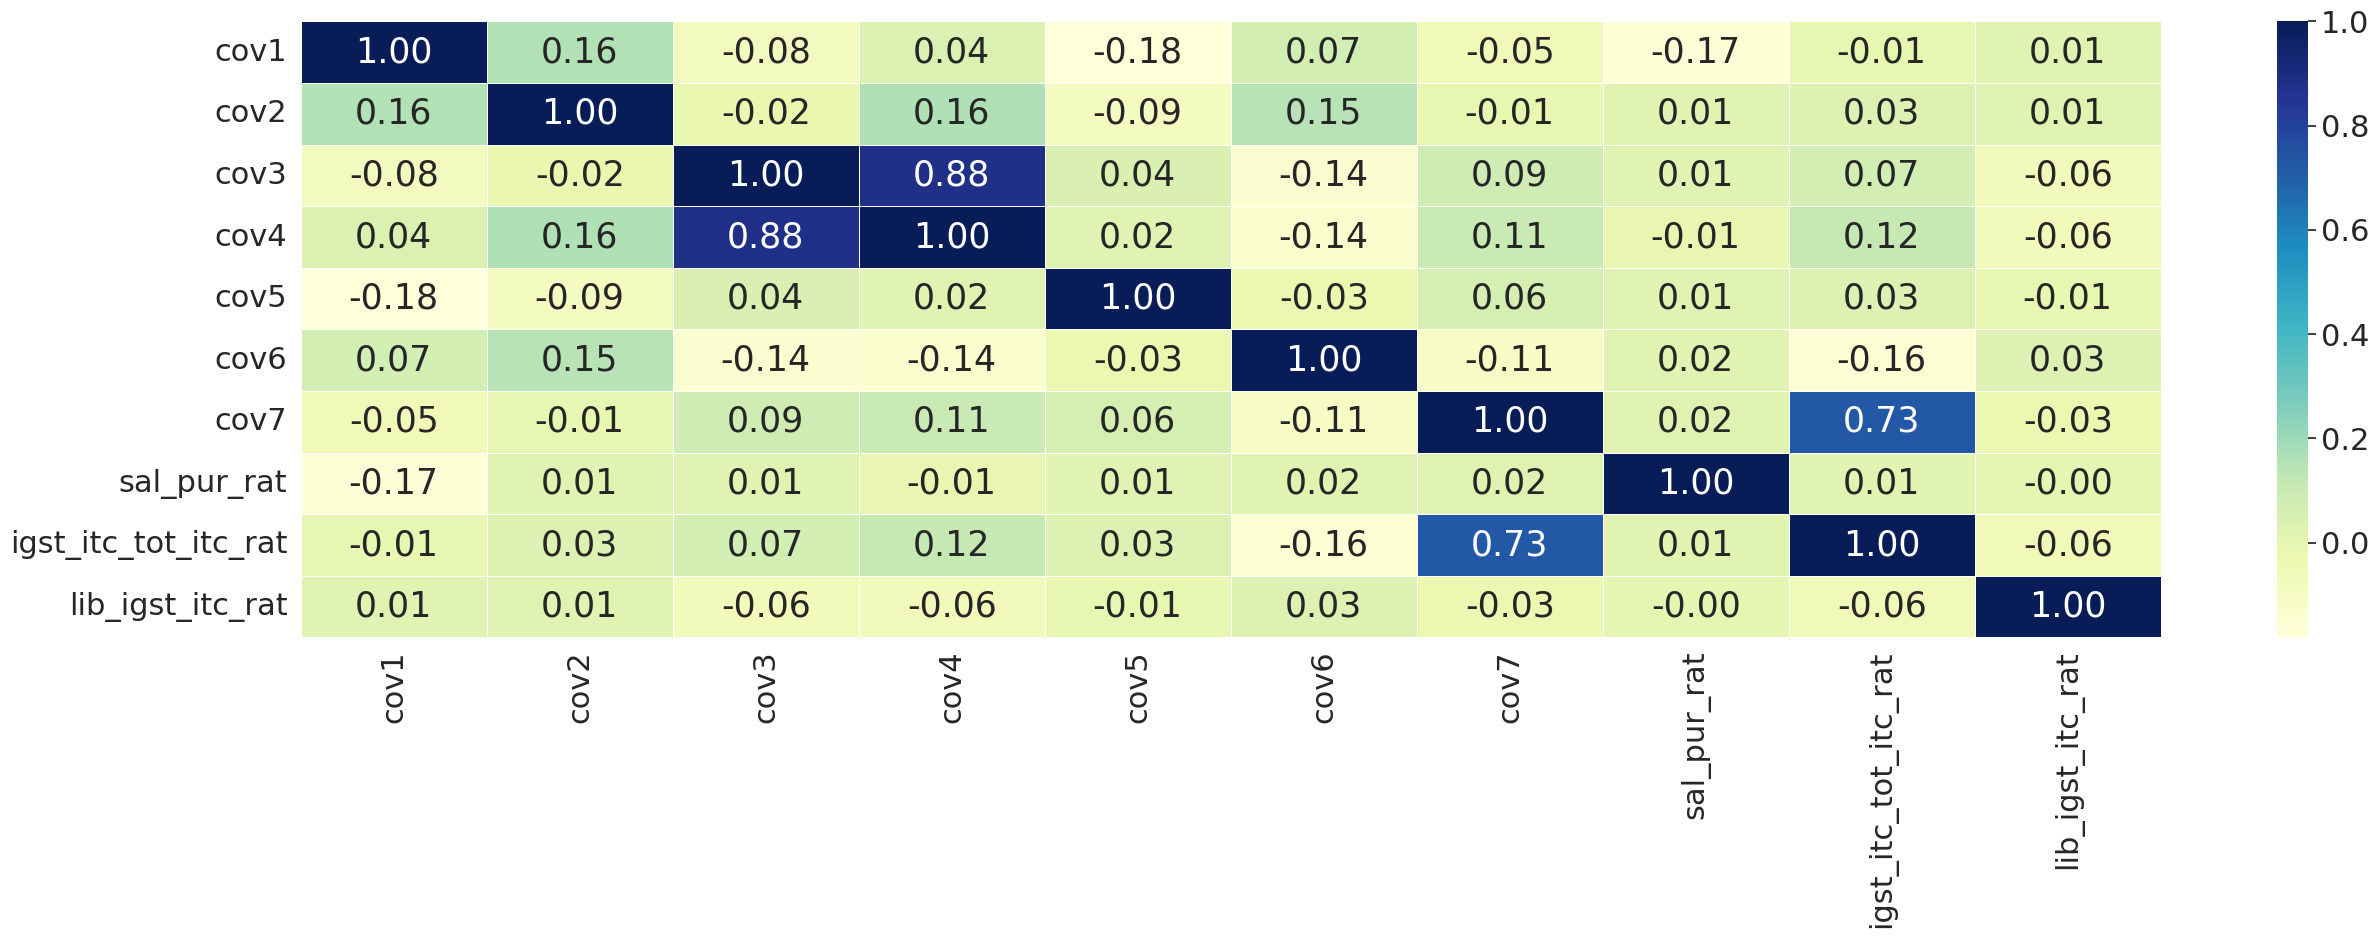

In [12]:
correlation_train = data.corr("pearson")
sns.set(font_scale=2)
fig = plt.figure(figsize=(30, 8))
ax = sns.heatmap(
    correlation_train,
    annot=True,
    annot_kws={"size": 25},
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
)
fig.show()


2 . Calculating normalized laplacian

In [6]:
 #computing the normalized laplacian from data
def get_laplacian(n):
    A = get_data()
    
    #computing KNN graph for the given data
    A = kneighbors_graph(A,n_neighbors=n)
    A = A.toarray()

    #computing the degree matrix D
    D = np.diag(A.sum(axis=1))
    D_inv_sqrt = np.linalg.inv(np.sqrt(D))

    #computing normalized laplacian matrix L
    L = np.eye(len(A)) - D_inv_sqrt @ A @ D_inv_sqrt
    return L

3 . Getting Eigen vectors

In [7]:
#Getting the eigen vectors
def get_vecs1(n):
  #calling the normalized laplacian funtion
    L = get_laplacian(n)
    
    #calculate eigen values and eigen vectors
    vals, vecs = np.linalg.eig(L)
    vals = np.array(np.round(vals,5),dtype=np.float32)
    vecs = np.array(vecs,dtype = np.float32)

    #returning positive sorted eigen values and corresponding eigen vectors
    counter = vals > 0
    vals = vals[counter]
    vecs = vecs[counter]
    Result = [(a,b) for a,b in zip(vals,vecs)]
    Result = sorted(Result , key = lambda x : x[0])
    return Result

In [8]:
#computing PCA to get 2D Plot
def get_plot(df,label):
    
    pca = PCA(n_components = 2, random_state = 7)
    pca_mdl = pca.fit_transform(df)

    emb_df_PCA = pd.DataFrame(pca_mdl,columns=['x','y'])
    fig = plt.figure(figsize=(6,4))
    
    plt.scatter(x = df[:,0],y = df[:,1],c=label)
    plt.show()

#computing PCA to get 3D Plot
def get_3dplot(df,labels):
    pca = PCA(n_components = 3, random_state = 7)
    data = pca.fit_transform(df)
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(x, y, z, c = labels,s=0.3)
    plt.show()


In [9]:
#getting n starting vectors from the given array
def get_df(arr,n):
    return np.array([arr[a][1] for a in range(n)]).T

4. Hyperparameter tuning for kmeans

In [10]:
from sklearn.cluster import KMeans
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

#Tuning Hyperparameter for K-means
def get_hyper_parameter(arr):
    res,ssd = [],[]
    for n in range(2,20):
        df = get_df(arr,n)
        kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto").fit(df)
        res.append((n,kmeans.inertia_))
        ssd.append(kmeans.inertia_)
    return sorted(res,key=lambda x:x[1])[0][0]

5 . Getting Results for the data

Number of Nieghbours taken: 6
6 2 Counter({0: 1194, 1: 5})


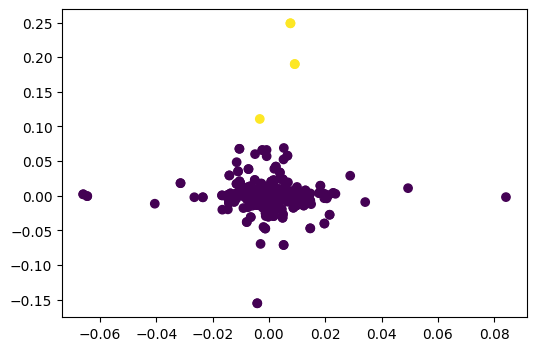

In [11]:
#Passing number of nieghbours and getting 
n_nieghbours = 6
print("Number of Nieghbours taken:",n_nieghbours)

#calculating eigen vectors
Result = get_vecs1(n_nieghbours)

#calculating hpyerparameters
n = get_hyper_parameter(Result)

#plotting kmeans for hyperparameters
df = get_df(Result,n)
kmeans = KMeans(n_clusters=n, n_init="auto",random_state=42).fit(df)
print(n_nieghbours,n,Counter(kmeans.labels_))

get_plot(df,kmeans.labels_)